#**Supervised Learning**

By: Thierno Diallo

In this notebook, we will explore two of the fundemental supresived machine learning methods discussed in lecture, regression and classification. A reminder from the associated lecture on supersvised learning:
- **Supervised Learning** is the process of learning from labeled data meaning that given a set of inputs and their correct outputs, a supervised learning model finds the rleationships between inputs and outputs. Then it uses this learned realationship to predict the outputs of unseen inputs.
-**Regression** is one a type of supervised learning method used to **predict continuous numerical values** given some unlabeled input. In this notebook, we explore the two popular regression models discussed in lecture: **Linear Regression** and **Logistic Regression**.
-**Classification** is another type of supervised learning method used to **predict discrete class labels** given some unlabeled input. In this notebook, we explore some popular classification models discussed in lecture: **K-Nearest Neighbors**, **Decision Trees**, and **upport Vector Machines**.

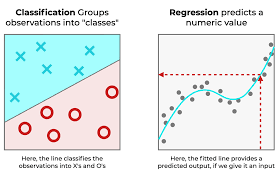

https://www.sharpsightlabs.com/blog/regression-vs-classification/

##Regression

We will start with exploring the regression algorithms discussed in lecture.

###Linear Regression

Linear regression is a supervised learning model.

Given data in the form:  
$$(X_1, Y_1), \dots, (X_N, Y_N)$$  
where each $X_i$ is an input and $Y_i$ is a real-valued (continuous) output.

The regression model learns a real-valued function mapping inputes to outputs :  
$$\hat{y} = f(X) \in \mathbb{R}$$

Here, we will examine the Graduate Admission 2 dataset from Kaggle to create a linear regression model predicting a student's chances of getting into graduate school given some attributes. Data source:

Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [ ]:
# Imports
%matplotlib inline
import kagglehub
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Load Data
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")
file_path = path + "/Admission_Predict_Ver1.1.csv"
data = pd.read_csv(file_path)
data = data.drop("Serial No.", axis=1)

100%|██████████| 9.64k/9.64k [00:00<00:00, 15.2MB/s]

Extracting files...


####Data Visualization

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )



In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: >

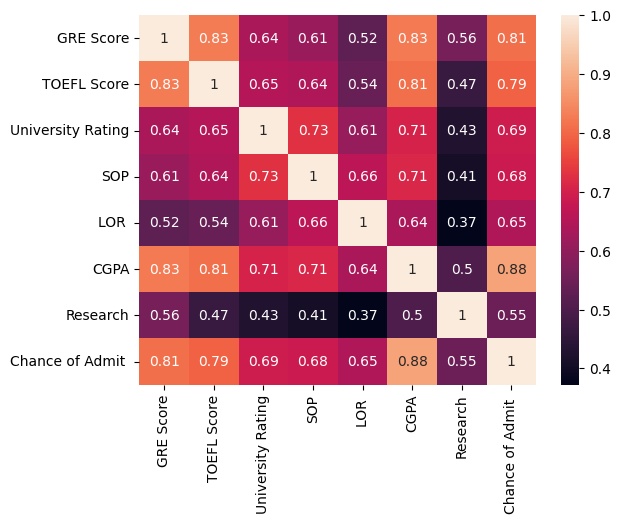

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
# TODO: Interpret the above heat map. Are there any interesting patterns?

<Axes: xlabel='CGPA', ylabel='Count'>

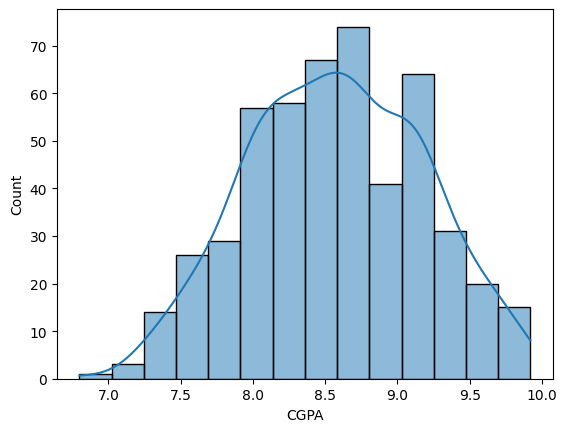

In [ ]:
sns.histplot(data['CGPA'], kde=True)

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

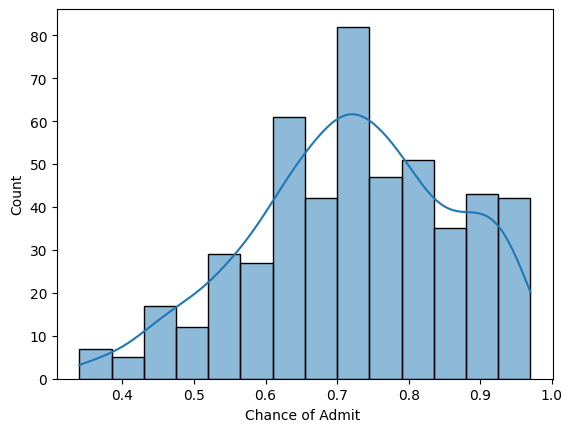

In [ ]:
sns.histplot(data['Chance of Admit '],kde=True)

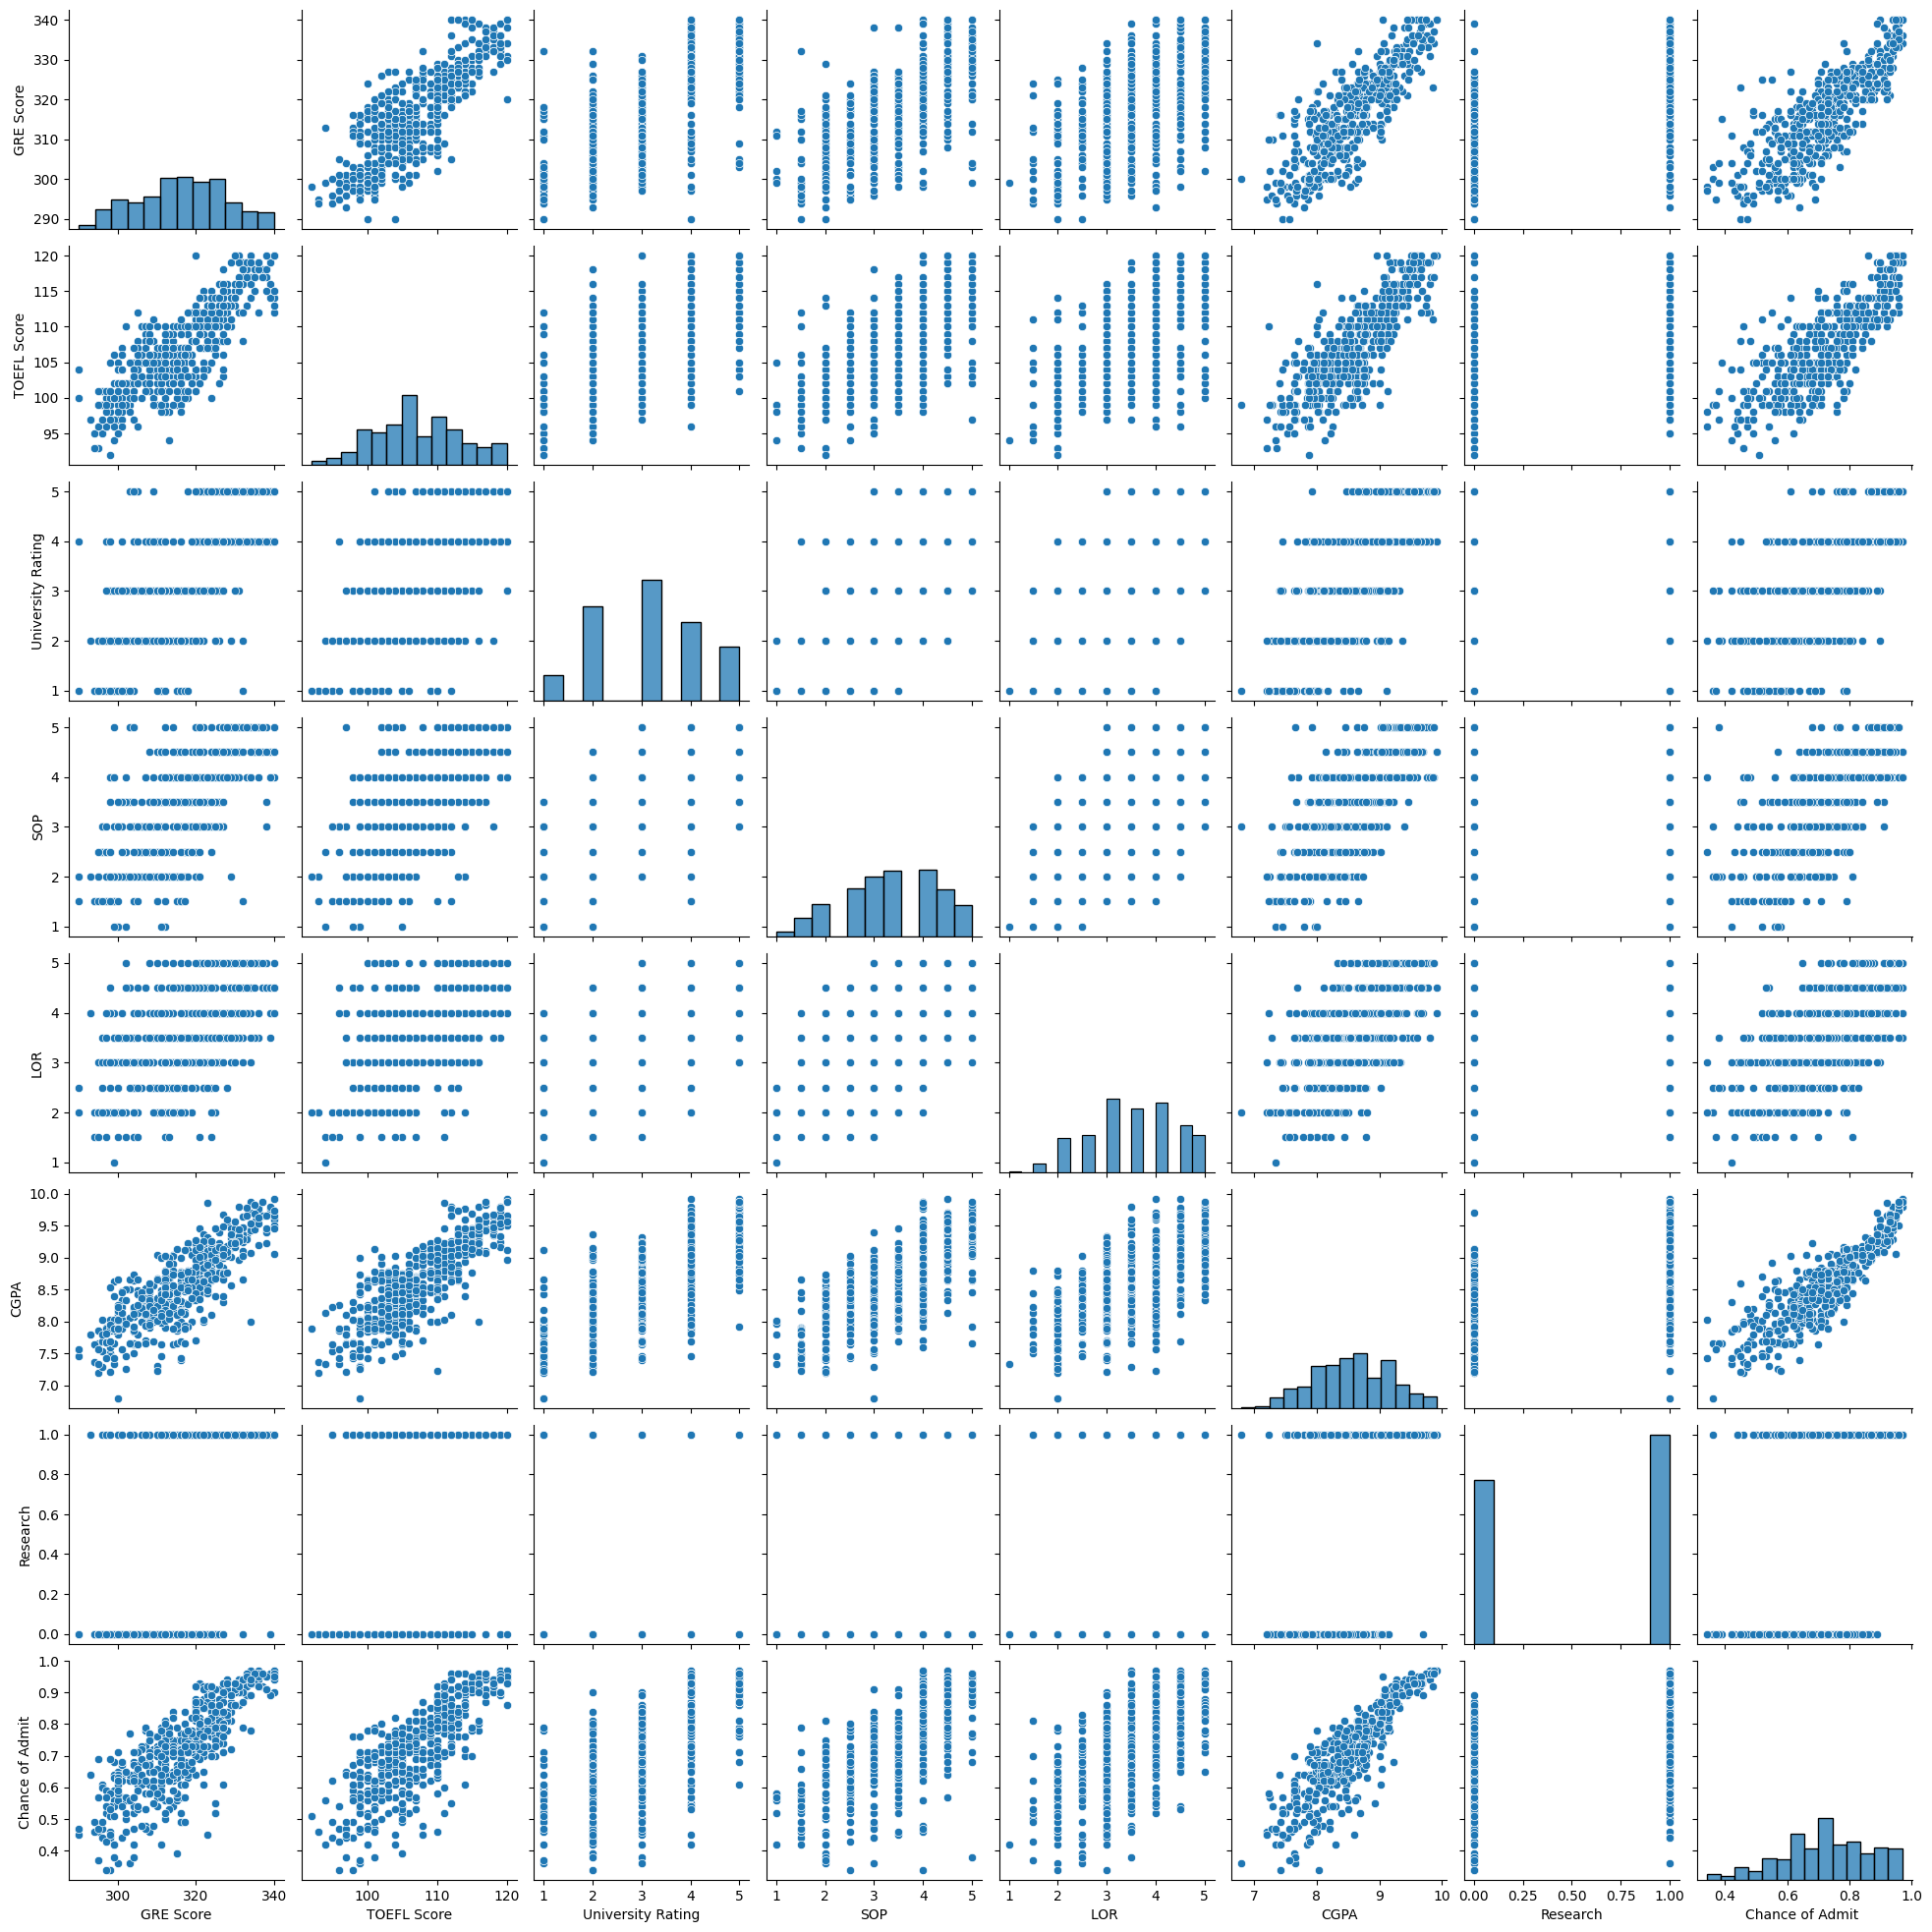

In [ ]:
sns.pairplot(data)

####Create and Evaluate the Model Using $R^2$ and MSE

The  $R^2$ coefficient of determination is defined as 1 - (sum of squares of the residuals)/(sum of total squares):

$$R^2 = 1 - \frac{SS_\text{res}}{SS_\text{tot}} = 1 - \frac{\sum_i (y_i - y_\text{pred})^2}{\sum_i (y_i - \bar{y})^2} $$

In [ ]:
#Split data into training and test
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = # TODO: Split into train and split

w = # TODO: Calculate the weights using the formula from lecture


y_pred = # TODO: Using the above weights, predict our test labels

#Calculate accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R2: ", r2)

MSE:  0.004247939937985419
R2:  0.7922767756486349


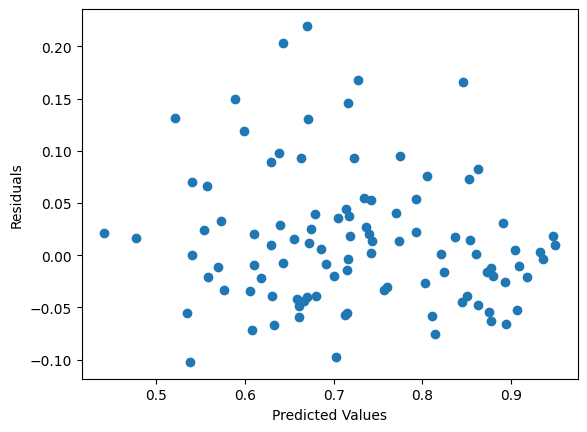

In [ ]:
plt.scatter(y_pred, y_pred - y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# TODO: Is homoskadasticity satisfied?

###Logistic Regression

Logistic regression is another regression model predicting the likelihod of an input belonging to an output class. Despite being a regression technique as outputs are continous propabilities, it is often used for binary classification as discussed in lecture.

We will use the breast cancer dataset from sklearn, which is a binary classification problem.

In [ ]:
# Load the dataset
data = load_breast_cancer(as_frame=True)
data = data.frame

####Data Visualization

In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

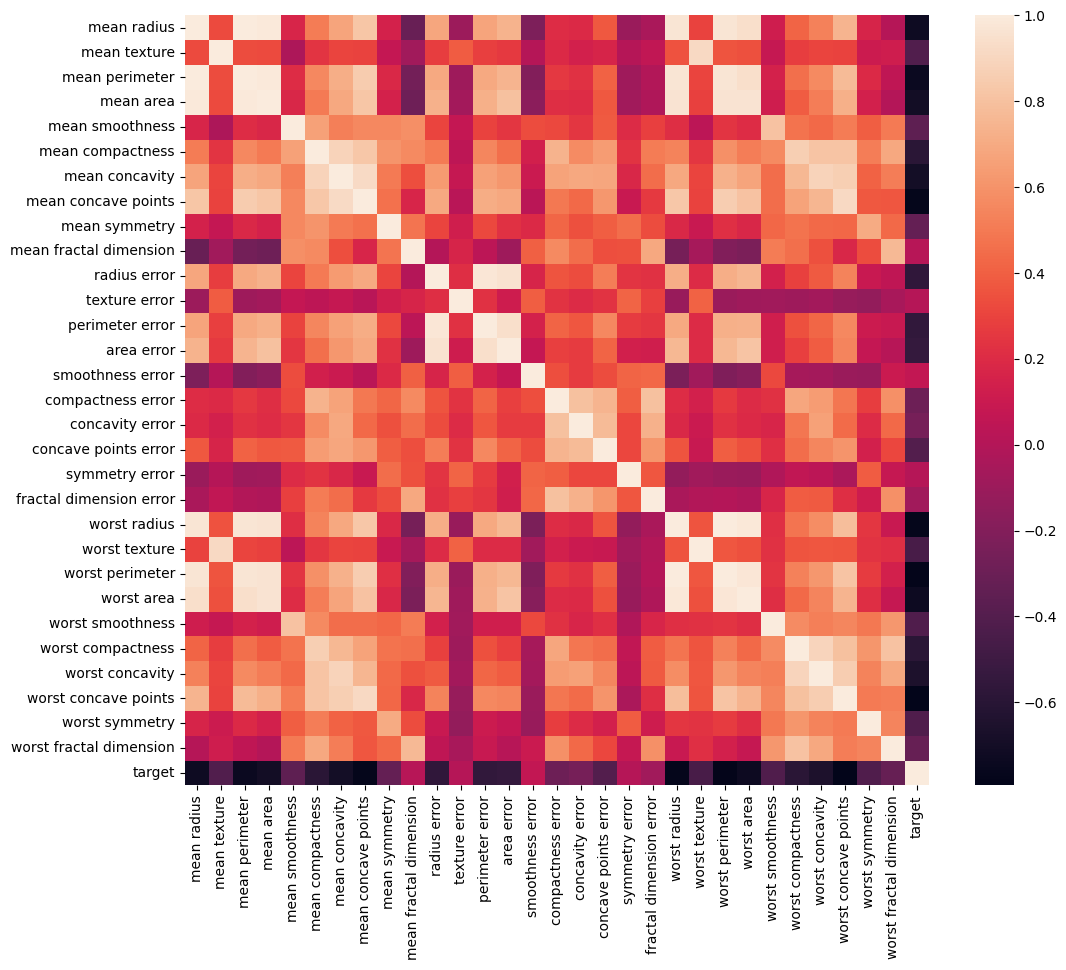

In [ ]:
plt.figure(figsize=(12, 10))
#TODO: Create a heatmap visualization

<Axes: xlabel='target', ylabel='Count'>

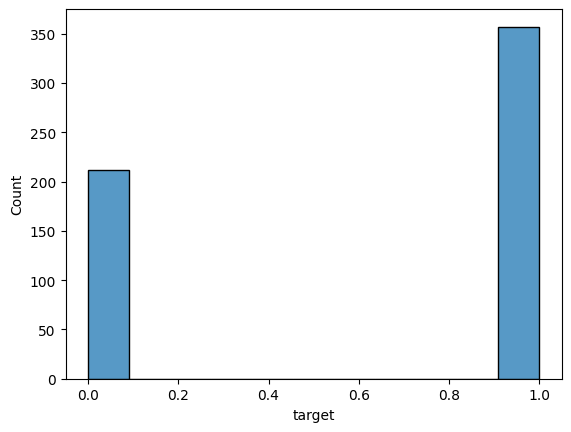

In [ ]:
sns.histplot(data['target'])

In [ ]:
# Create another useful visualization

In [ ]:
# Split data into inputs (X) and targets (y)
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = # TODO: Split data into training and test sets

####Create and Evaluate the Model

In this section, we will implement logistic regression from scratch without using high-level libraries like scikit-learn.

**Step-by-Step Implementation:**

1. **Sigmoid Function**: Used to map any real-valued number to a value between 0 and 1:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
2. **Model Parameters**: Initialize weights and bias.
3. **Model Output**: Compute the linear combination of inputs and weights, then apply the sigmoid function.
4. **Loss Function**: Use binary cross-entropy loss:
$$
-\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$
5. **Gradient Descent**: Update the weights and bias to minimize the loss.

Full Gradient Derivation (with Chain Rule)

We aim to compute the gradient of the **binary cross-entropy loss** with respect to the weights \( w \) in logistic regression.

---

### Definitions

For a single training example \( x^{(i)} \in \mathbb{R}^n \), with label \( y^{(i)} \in \{0, 1\} \):

$$
z^{(i)} = w^\top x^{(i)} + b
$$

$$
\hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}
$$

$$
L^{(i)} = - \left( y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)
$$

---

### Gradient Derivation via Chain Rule

We want:

$$
\frac{\partial L^{(i)}}{\partial w}
$$

Apply the chain rule:

$$
\frac{\partial L^{(i)}}{\partial w} =
\frac{\partial L^{(i)}}{\partial \hat{y}^{(i)}}
\cdot \frac{\partial \hat{y}^{(i)}}{\partial z^{(i)}}
\cdot \frac{\partial z^{(i)}}{\partial w}
$$

Step-by-step:

$$
\frac{\partial L^{(i)}}{\partial \hat{y}^{(i)}} = -\frac{y^{(i)}}{\hat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \hat{y}^{(i)}}
$$

$$
\frac{\partial \hat{y}^{(i)}}{\partial z^{(i)}} = \hat{y}^{(i)} (1 - \hat{y}^{(i)})
$$

$$
\frac{\partial z^{(i)}}{\partial w} = x^{(i)}
$$

Putting it all together:

$$
\frac{\partial L^{(i)}}{\partial w}
= \left( -\frac{y^{(i)}}{\hat{y}^{(i)}} + \frac{1 - y^{(i)}}{1 - \hat{y}^{(i)}} \right)
\cdot \hat{y}^{(i)} (1 - \hat{y}^{(i)}) \cdot x^{(i)}
$$

This simplifies nicely to:

$$
\frac{\partial L^{(i)}}{\partial w} = (\hat{y}^{(i)} - y^{(i)}) \cdot x^{(i)}
$$

---

### Final Gradient Over the Dataset

The total cost over \( m \) examples:

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^m L^{(i)}
$$

The gradients are:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x^{(i)} = \frac{1}{m} X (\hat{Y} - Y)^\top
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
$$

**Where:**

$$
X \in \mathbb{R}^{n \times m} \quad \text{is the feature matrix (columns = training examples)}
$$

$$
\hat{Y}, Y \in \mathbb{R}^{1 \times m} \quad \text{are the predicted and true label vectors}
$$

---

### Parameter Updates (Gradient Descent)

Using gradient descent, we update the parameters in the direction opposite to the gradient:

$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Here, \( \alpha \) is the **learning rate**, which controls the size of the step taken toward minimizing the loss.

This update is applied iteratively to learn optimal parameters \( w \) and \( b \).



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sigmoid function with clipping to avoid overflow
def sigmoid(z):
    # TODO: Implement the sigmoid function with clipping to avoid overflow
    pass

# Initialize weights and bias
def initialize_parameters(dim):
    # TODO: Initialize the weights and bias for logistic regression
    pass

# Forward and backward propagation
def propagate(w, b, X, y):
    # TODO: Implement forward propagation to calculate the cost and activation
    # TODO: Implement backward propagation to calculate gradients
    pass

# Gradient descent optimization
def optimize(w, b, X, y, num_iterations, learning_rate):
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, y)
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    return y_prediction

def logistic_regression_model(X_train, y_train, num_iterations, learning_rate):
    dim = X_train.shape[0]
    w, b = initialize_parameters(dim)

    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate)

    w = parameters["w"]
    b = parameters["b"]

    return w, b

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transpose the data for our scratch implementation
X_train_np = X_train_scaled.T
X_test_np = X_test_scaled.T
y_train_np = y_train.to_numpy().reshape(1, -1)
y_test_np = y_test.to_numpy().reshape(1, -1)

# Train the model
w, b = logistic_regression_model(X_train_np, y_train_np, num_iterations=10000, learning_rate=0.01)

# Evaluate the model
y_prediction_train = predict(w, b, X_train_np)
y_prediction_test = predict(w, b, X_test_np)

train_accuracy = 100 - np.mean(np.abs(y_prediction_train - y_train_np)) * 100
test_accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test_np)) * 100

print("Train accuracy: {} %".format(train_accuracy))
print("Test accuracy: {} %".format(test_accuracy))

Train accuracy: 98.68131868131869 %
Test accuracy: 98.24561403508773 %


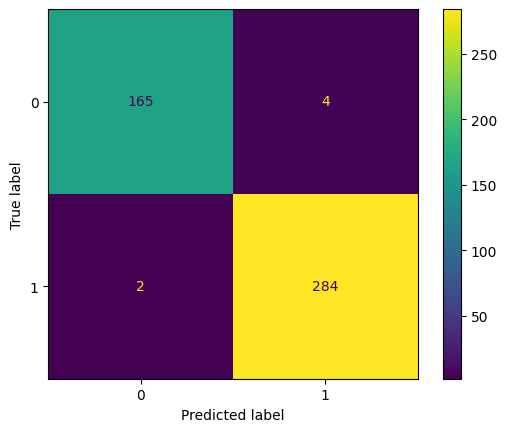

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train_np[0], y_prediction_train[0])).plot()

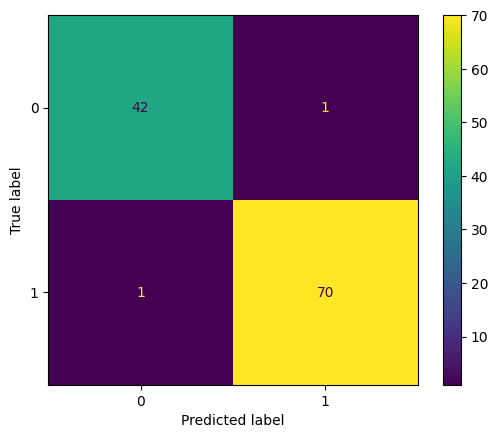

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_np[0], y_prediction_test[0])).plot()
# TODO: Interpret the plots.

####Using Library Model

Now, let's see how we can achieve a similar logistic regression model using a high-level library like scikit-learn.

In [ ]:
# TODO: Scale the features
# - Use StandardScaler to standardize the training and test feature sets.
# - Fit the scaler on the training data and transform both the training and test data.

# TODO: Initialize the logistic regression model
# - Set up a LogisticRegression model with a maximum of 5000 iterations.

# TODO: Train the model
# - Fit the logistic regression model on the scaled training data.

# TODO: Make predictions
# - Use the trained model to predict outcomes on both the scaled training and test data.

# TODO: Calculate accuracy
# - Calculate the accuracy of the model on the training and test sets using accuracy_score.
# - Output the accuracy results in percentage format for both the training and test data.

Train accuracy (scikit-learn): 98.68 %
Test accuracy (scikit-learn): 97.37 %


##Classification

Now we will move on to implementing, exploring and comparing the classification algorithms discussed in lecture.

###K-Nearest Neighbors (KNN)

This supervised learning algorithm views our training data as clusteres grouped by thier class labels resulting in as many clusters as labels. Given a new input, this model classifies the input with the same class label as the majority class of that input's K closest neighbors. Here, closeness is calculated using the eucliedean distance between the input and all training points.

**Below is an outline of the algorithm:**
- Define K (number of neighbors)
- For each new data point X:
  - Compute the euclidean distance between X and all training points
  - Classify X with the label of the most frequent class among its K nearest neighbors

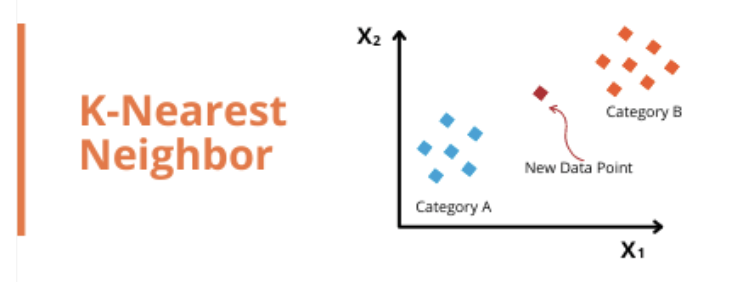

We will use the Iris dataset from Sklearn for this section. It is a small multiclass dataset allowing for great visualizations.

In [ ]:
# Load the dataset
data = load_iris(as_frame=True)
df = data.frame

####Data Visualization

In [ ]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

From the description above, we see that we have four features and three class labels:

- **0: Iris-Setosa**
- **1: Iris-Versicolour**
- **2: Iris-Virginica**

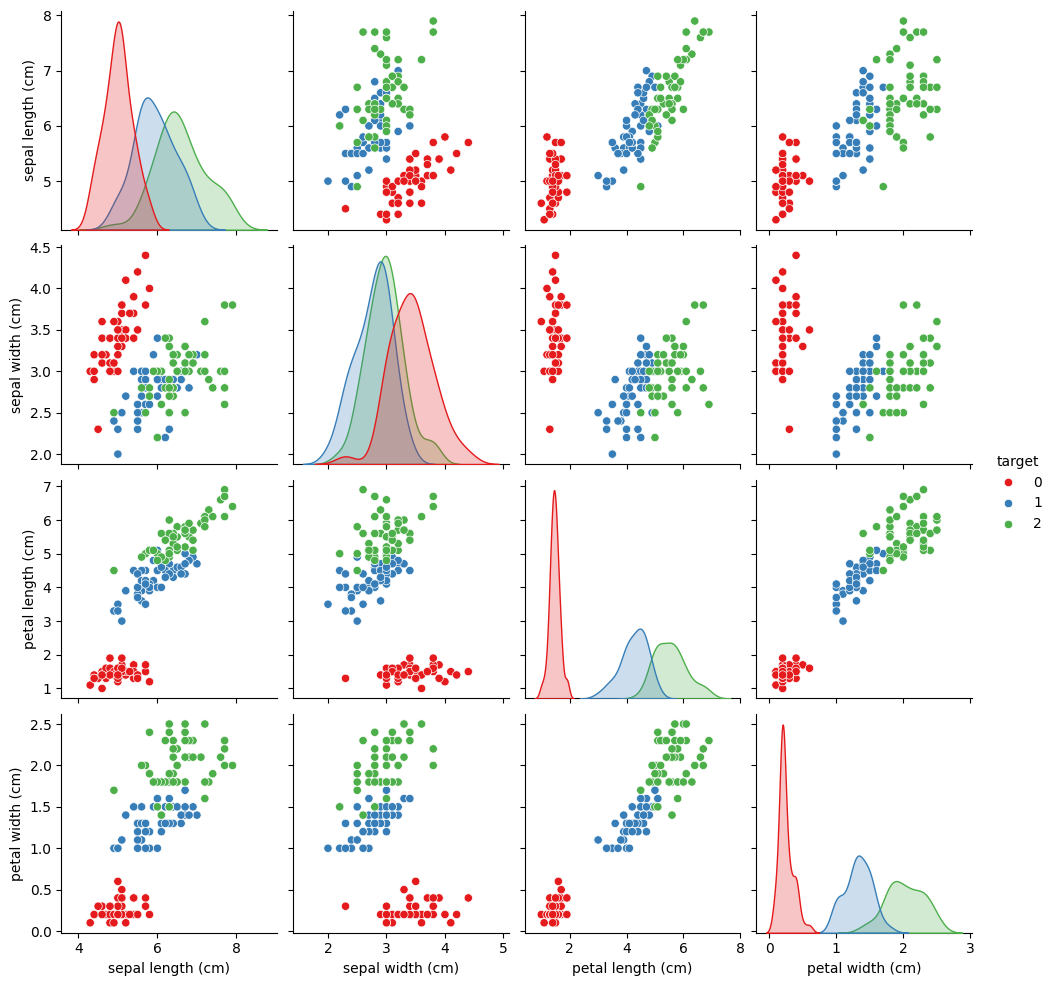

In [ ]:
sns.pairplot(df, hue='target', palette='Set1')
# TODO: What are the plots below telling us? Any interesting trends?

<Axes: >

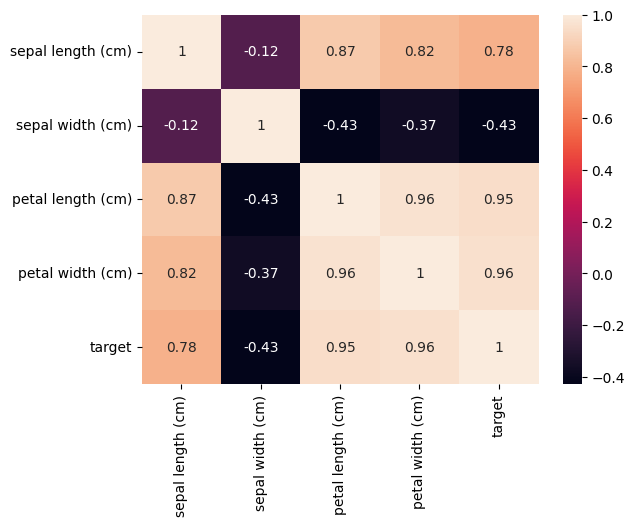

In [ ]:
sns.heatmap(df.corr(), annot=True)

####Create and Evaluate Model

In [ ]:
#Create KNN
class KNN:
  def __init__(self, X_train, X_test, y_train, k):
      self.X_train = X_train
      self.X_test = X_test
      self.y_train = y_train
      self.k = k

  def euclidean_distance(self, x1, x2):
    # TODO: Calculate the eucledian distance
    pass

  def predict(self):
    y_pred = []
    for x in self.X_test:
      distances = []
      for i in range(len(self.X_train)):
        # TODO: Predict the test labels
        pass

    return y_pred

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = # TODO: Split data

###Evaluate Model With Varying Features

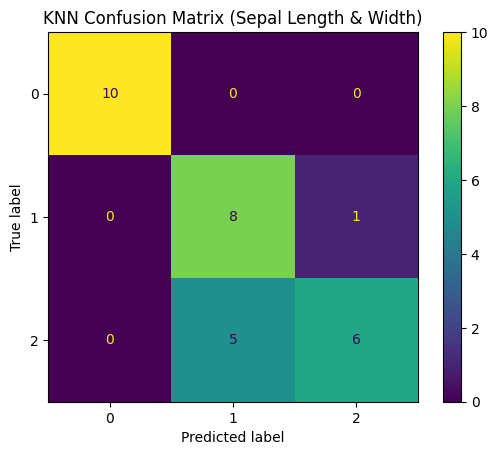

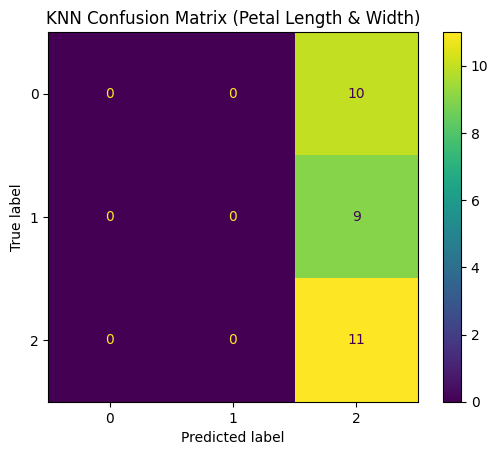

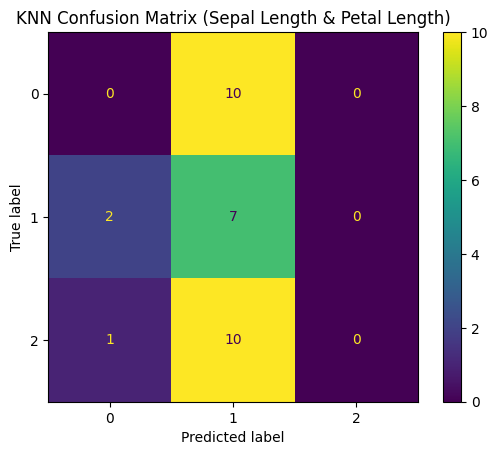

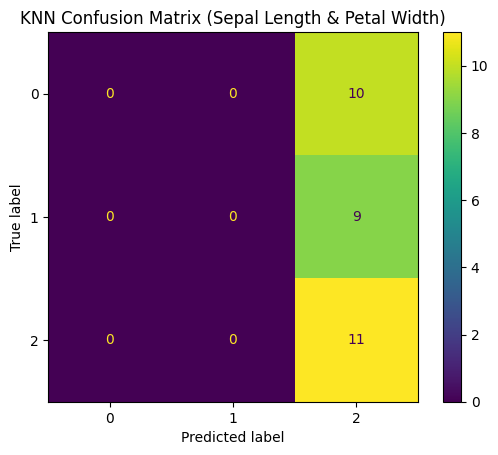

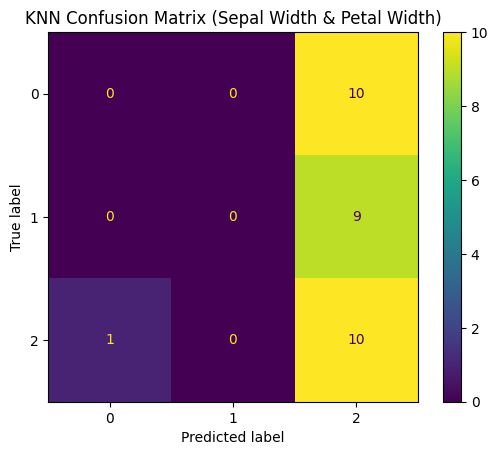

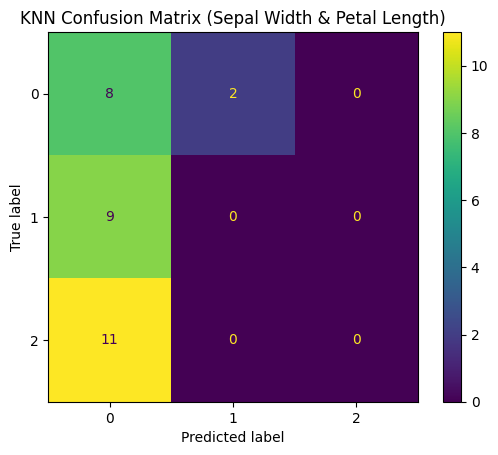

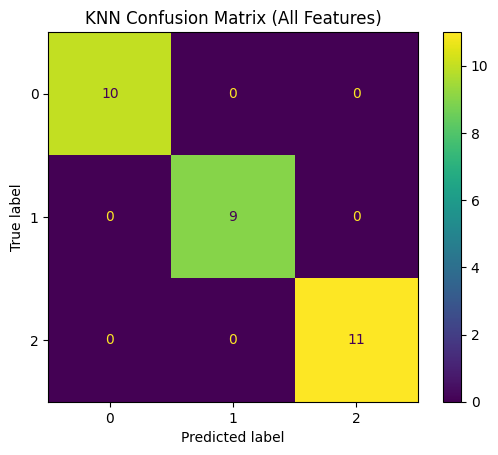

In [ ]:
K = 10

# TODO: Run the above model with sepal length and width features alone
knn =
y_pred =
ConfusionMatrixDisplay(confusion_matrix(y_test.to_numpy(), y_pred)).plot()
plt.title("KNN Confusion Matrix (Sepal Length & Width)")

# TODO: Run the above model with petal length and width features alone
knn =
y_pred =
ConfusionMatrixDisplay(confusion_matrix(y_test.to_numpy(), y_pred)).plot()
plt.title("KNN Confusion Matrix (Petal Length & Width)")

# TODO: Run the above model with all features
knn =
y_pred =
ConfusionMatrixDisplay(confusion_matrix(y_test.to_numpy(), y_pred)).plot()
plt.title("KNN Confusion Matrix (All Features)")

plt.show() # Display all plots at the end.

####Using a Library

In [ ]:
K=10
# Function to train, predict, and plot
def train_predict_plot(X_train_data, X_test_data, plot_data, title):
    # TODO: Run the KNeighborsClassifier model from SKLearn
    knn =
    y_pred =

    # Confusion Matrix Plot
    ConfusionMatrixDisplay(confusion_matrix(y_test.to_numpy(), y_pred)).plot()
    plt.title(f"KNN Confusion Matrix ({title})")
    plt.show()

    # Decision Regions Plot
    plot_decision_regions(plot_data, y.values, clf=knn, legend=2)
    plt.title(f"KNN Decision Regions ({title})")
    plt.show()

# TODO: Run the above fucntion for the specific features in the description
train_predict_plot( , , , "Sepal Length & Width")
train_predict_plot( , , , "Petal Length & Width")

# Run Model with all features (Confusion Matrix only)
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test.to_numpy(), y_pred)).plot()
plt.title("KNN Confusion Matrix (All Features)")
plt.show()

###Decision Tree (DT)

Alternatively, we could use a decission tree here to see how well it performs compared to the K-Nearest neighbors. Here, we will use the library model from SKLearn, but the general algorithm is the same as discussed in lecture:
- Select the best feature to split on and split the dataset based on it.
- Recursively repeat the above for each subset until some stopping condition. The leaf node should be the category.
- For each new input, traverse the tree based on feature values until a leaf node classification.



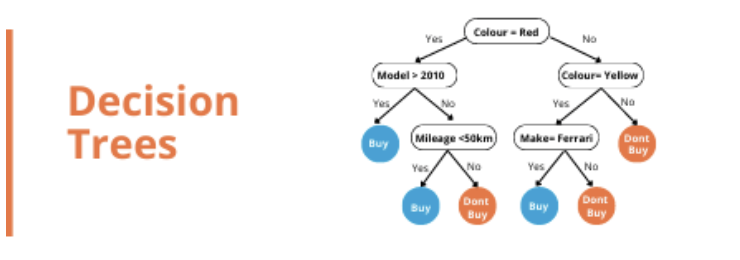

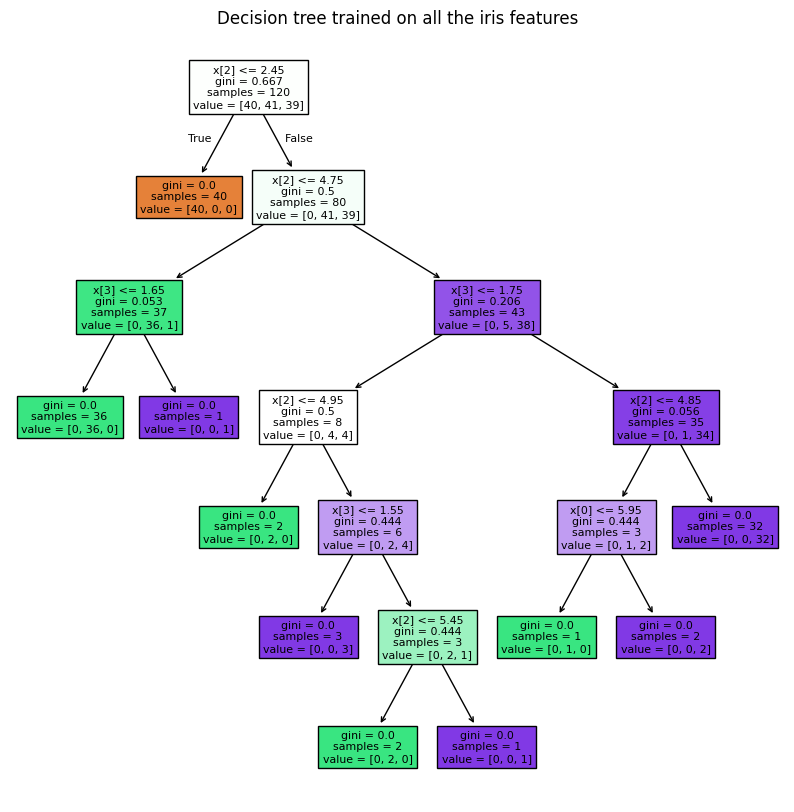

In [ ]:
plt.figure(figsize=(10, 10))
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
plot_tree(DT, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

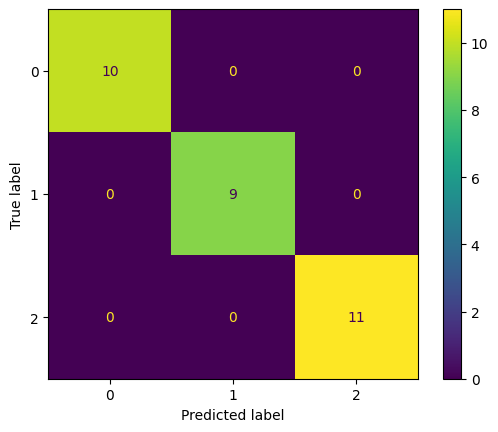

In [ ]:
y_pred = DT.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [ ]:
# TODO: How does the KNN perform versus the DT on the Iris dataset?
# When would you chose over leaerning algorithm over the other